# Stock Price Analysis Dashboard

* Pull historical stock data (Yahoo Finance API, yfinance).
* Plot moving averages, returns, volatility.
* Add simple performance metrics (Sharpe ratio, drawdown).


In [3]:
import yfinance as yf
from matplotlib import pyplot as plt
import numpy as np

In [4]:
dat = yf.Ticker("NVDA") # look at nvidia stock

In [6]:
dat.info

{'address1': '2788 San Tomas Expressway',
 'city': 'Santa Clara',
 'state': 'CA',
 'zip': '95051',
 'country': 'United States',
 'phone': '408 486 2000',
 'website': 'https://www.nvidia.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "NVIDIA Corporation, a computing infrastructure company, provides graphics and compute and networking solutions in the United States, Singapore, Taiwan, China, Hong Kong, and internationally. The Compute & Networking segment includes its Data Centre accelerated computing platforms and artificial intelligence solutions and software; networking; automotive platforms and autonomous and electric vehicle solutions; Jetson for robotics and other embedded platforms; and DGX Cloud computing services. The Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and 

In [26]:
ntab = dat.history(period='1y')

In [27]:
ntab

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-22 00:00:00-04:00,129.978943,130.708708,123.061123,123.700920,376189100,0.0,0.0
2024-08-23 00:00:00-04:00,125.820246,129.559070,125.180449,129.329132,323230300,0.0,0.0
2024-08-26 00:00:00-04:00,129.529093,131.218547,124.330730,126.420067,331964700,0.0,0.0
2024-08-27 00:00:00-04:00,125.010517,129.159201,123.840881,128.259491,303134600,0.0,0.0
2024-08-28 00:00:00-04:00,128.079537,128.289478,122.601272,125.570335,448101100,0.0,0.0
...,...,...,...,...,...,...,...
2025-08-18 00:00:00-04:00,180.600006,182.940002,180.589996,182.009995,132008000,0.0,0.0
2025-08-19 00:00:00-04:00,182.429993,182.500000,175.490005,175.639999,185229200,0.0,0.0
2025-08-20 00:00:00-04:00,175.169998,176.000000,168.800003,175.399994,215142700,0.0,0.0


Text(0.5, 1.0, 'Price of NVIDIA Stock')

<Figure size 640x480 with 0 Axes>

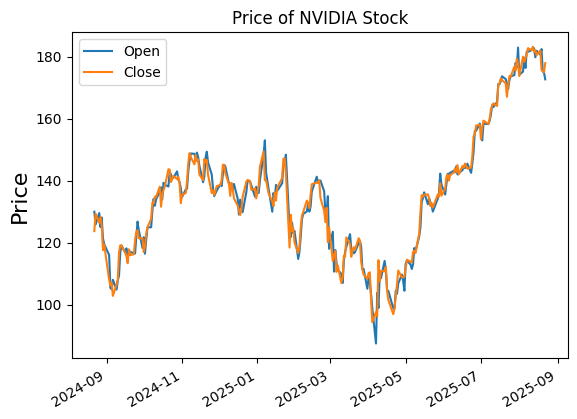

In [29]:
plt.figure()
ntab.plot(y=['Open','Close'])
#ntab.plot(y='Close')
plt.ylabel("Price", fontsize=16)
plt.xlabel("", fontsize=16)
plt.title("Price of NVIDIA Stock")

Text(0.5, 1.0, 'Price of AAPL Stock')

<Figure size 640x480 with 0 Axes>

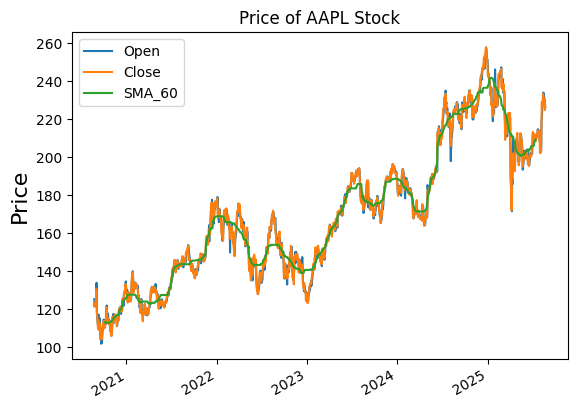

In [52]:
stock_name = 'AAPL'
dat = yf.Ticker(stock_name) # look at nvidia stock
ntab = dat.history(period='5y')

start_date = '2020-01-01'
end_date = '2025-08-22'
df2 = dat.history(start=start_date, end=end_date)

# create a moving average
# Calculate Simple Moving Average (SMA) with a window of 3
ntab['SMA_60'] = ntab['Close'].rolling(window=60, center=True).median()
plt.figure()
ntab.plot(y=['Open','Close','SMA_60'])
#ntab.plot(y='Close')
plt.ylabel("Price", fontsize=16)
plt.xlabel("", fontsize=16)
plt.title(f"Price of {stock_name} Stock")

In [53]:
df2

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,71.545890,72.598892,71.292304,72.538513,135480400,0.0,0.0
2020-01-03 00:00:00-05:00,71.765651,72.594040,71.608669,71.833275,146322800,0.0,0.0
2020-01-06 00:00:00-05:00,70.954188,72.444321,70.703012,72.405678,118387200,0.0,0.0
2020-01-07 00:00:00-05:00,72.415353,72.671356,71.845385,72.065163,108872000,0.0,0.0
2020-01-08 00:00:00-05:00,71.768071,73.526287,71.768071,73.224396,132079200,0.0,0.0
...,...,...,...,...,...,...,...
2025-08-15 00:00:00-04:00,234.000000,234.279999,229.339996,231.589996,56038700,0.0,0.0
2025-08-18 00:00:00-04:00,231.699997,233.119995,230.110001,230.889999,37476200,0.0,0.0
2025-08-19 00:00:00-04:00,231.279999,232.869995,229.350006,230.559998,39402600,0.0,0.0


Text(0.5, 1.0, 'Price of AAPL Stock')

<Figure size 640x480 with 0 Axes>

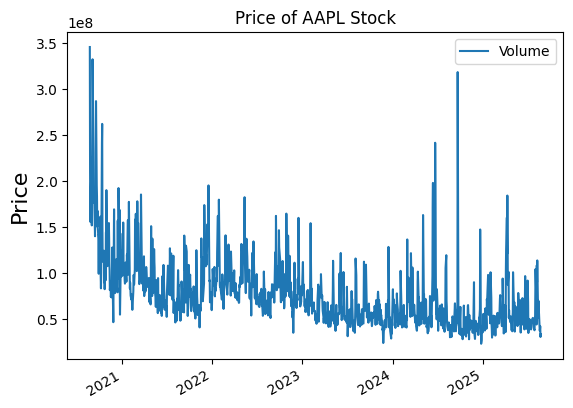

In [55]:
plt.figure()
ntab.plot(y=['Volume'])
#ntab.plot(y='Close')
plt.ylabel("Price", fontsize=16)
plt.xlabel("", fontsize=16)
plt.title(f"Price of {stock_name} Stock")

In [56]:
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2025-08-22'
df = yf.download(ticker, start=start_date, end=end_date)

/var/folders/d_/xbzntjjj2rz0d1tfc4s267ww0000gq/T/ipykernel_14473/395805107.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Price of AAPL Stock')

<Figure size 640x480 with 0 Axes>

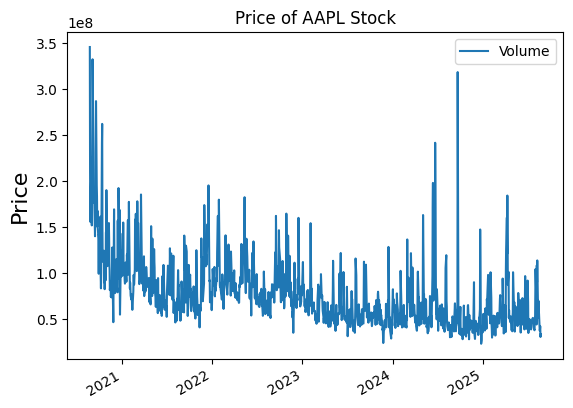

In [57]:
plt.figure()
ntab.plot(y=['Volume'])
#ntab.plot(y='Close')
plt.ylabel("Price", fontsize=16)
plt.xlabel("", fontsize=16)
plt.title(f"Price of {stock_name} Stock")

In [58]:
print(df.columns)

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [63]:
df['Volume'][0]

KeyError: 0